In [1]:
import pandas as pd   
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks 

## data loading

### movie data

In [2]:
movies = pd.read_csv('ml-1m/movies.dat', sep = '::', header = None, ) #separator whitespace  

/home/amifaraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


##### MovieID::Title::Genres

In [3]:
movies = movies.rename(columns={0: "MovieID", 1: "Title", 2: "Genre"})
movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### user data

In [4]:
users = pd.read_csv('ml-1m/users.dat', sep = '::', header = None )

/home/amifaraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


 ##### UserID::Gender::Age::Occupation::Zip-code

#### Age group
    *  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"



In [5]:
users = users.rename(columns={0: "UserID", 1: "Gender", 2: "Age", 3: "Occupation", 4:"zip_code"})
users['Occupation'] = users['Occupation'].replace({0: 'other', 1: 'academic', 2: 'artist', 3: 'clerical',
                                                   4: 'grad student', 5:  "customer service",6:  "doctor",
                                                   7:  "executive/managerial", 8:  "farmer", 9:  "homemaker", 10:  "K-12 student", 
                                                   11:  "lawyer", 12:  "programmer", 13:  "retired", 14:  "marketing",
                                                   15:  "scientist", 16:  "self-employed", 17:  "engineer",
                                                   18:  "craftsman", 19:  "unemployed", 20:  "writer"
                                                   })
users.head()

,UserID,Gender,Age,Occupation,zip_code
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


In [6]:
type(users['Occupation'].iloc[0])

str

## Ratings

In [7]:
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', header = None )

/home/amifaraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


#### UserID::MovieID::Rating::Timestamp

In [8]:
ratings.rename(columns={0: "UserID", 1: "MovieID", 2: "Rating", 3: "Timestamp"}, inplace = True)
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [88]:
ratings.nunique()

UserID         6040
MovieID        3706
Rating            5
Timestamp    458455
Year              4
dtype: int64

In [102]:
ratings['MovieID'].nunique()

3706

In [104]:
movies['MovieID'].nunique()-ratings['MovieID'].nunique()

177

In [97]:
df = groupby_count(joined, ['Genre', 'Title'], 'UserID')

## Count

In [9]:
def groupby_count(df, group, count):
    result = pd.DataFrame()
    result['count'] = df.groupby(group)[count].count()
    #result.reset_index(inplace = True)
    return result 

In [10]:
def join(df1, df2, how, on):
    result = pd.merge(df1, df2, how = how, on=on)
    return result

### #ratings per movie

In [11]:
mov_ratings = groupby_count(ratings, 'MovieID', 'Rating')
mov_ratings.head()

,count
MovieID,
1,2077
2,701
3,478
4,170
5,296


### popular movies

In [12]:
pop_mov = join(mov_ratings, movies, 'left', 'MovieID')
pop_mov.sort_values(by = 'count', ascending = False).head(10)

,MovieID,count,Title,Genre
2651,2858,3428,American Beauty (1999),Comedy|Drama
253,260,2991,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
1106,1196,2990,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
1120,1210,2883,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
466,480,2672,Jurassic Park (1993),Action|Adventure|Sci-Fi
1848,2028,2653,Saving Private Ryan (1998),Action|Drama|War
575,589,2649,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
2374,2571,2590,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1178,1270,2583,Back to the Future (1985),Comedy|Sci-Fi
579,593,2578,"Silence of the Lambs, The (1991)",Drama|Thriller


### ratings per user count

In [13]:
user_rate = groupby_count(ratings, 'UserID', 'Rating')
user_rate.head()

,count
UserID,
1,53
2,129
3,51
4,21
5,198


### active users

In [14]:
active_users = join(user_rate, users, 'left', 'UserID')
active_users.sort_values(by = 'count', ascending = False).head(10)

,UserID,count,Gender,Age,Occupation,zip_code
4168,4169,2314,M,50,other,66048
1679,1680,1850,M,25,writer,95380
4276,4277,1743,M,35,self-employed,98133
1940,1941,1595,M,35,engineer,94550
1180,1181,1521,M,35,executive/managerial,20716
888,889,1518,M,45,writer,10024
3617,3618,1344,M,56,engineer,22657
2062,2063,1323,M,25,grad student,43138
1149,1150,1302,F,25,writer,75226
1014,1015,1286,M,35,clerical,11220


## active users on gender

In [15]:
gender_active = groupby_count(active_users, 'Gender', 'count')
gender_active.reset_index(inplace=True)

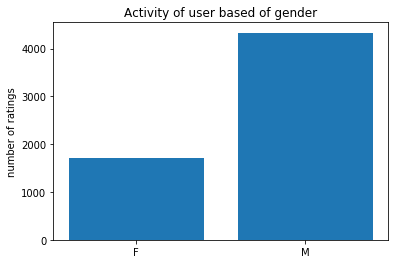

In [16]:
X = gender_active['count']
Y = gender_active['Gender']

plt.bar(Y,X)

plt.ylabel('number of ratings')
plt.title('Activity of user based of gender')

plt.show()

### occupation

In [17]:
occ_active = groupby_count(active_users, 'Occupation', 'count')
occ_active.sort_values(by = 'count', ascending = False)

,count
Occupation,
grad student,759
other,711
executive/managerial,679
academic,528
engineer,502
programmer,388
marketing,302
writer,281
artist,267


## grad student watches more movie and rated
## farmers rated least movie


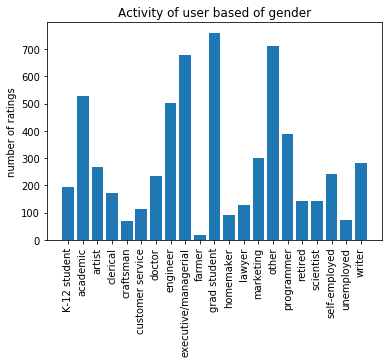

In [18]:
occ_active.reset_index(inplace =True)
X = occ_active['count']
Y = occ_active['Occupation']
plt.xticks(rotation=90)
plt.bar(Y,X)

plt.ylabel('number of ratings')
plt.title('Activity of user based of gender')

plt.show()

## age

In [19]:
age_active = groupby_count(active_users, 'Age', 'count')
age_active.sort_values(by = 'count', ascending = False)

,count
Age,
25,2096
35,1193
18,1103
45,550
50,496
56,380
1,222


### 25:  "25-34" are most active 

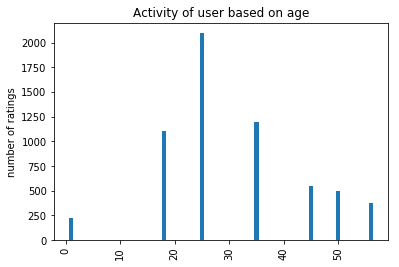

In [20]:
age_active.reset_index(inplace=True)
X = age_active['count']
Y = age_active['Age']
plt.xticks(rotation=90)
plt.bar(Y,X)

plt.ylabel('number of ratings')
plt.title('Activity of user based on age')

plt.show()

### Age group
    *  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

In [21]:
age_gender_active = groupby_count(active_users, ['Age','Occupation'], 'count')
age_gender_active.sort_values(by = 'count', ascending = False).head()

count
Age Occupation                 
18  grad student            534
25  other                   298
    executive/managerial    253
35  executive/managerial    214
25  engineer                202

In [22]:
movie_rating = join(ratings, movies, 'left', 'MovieID')
movie_rating.drop(columns=['Timestamp'],inplace = True)
movie_user_ratings = join(movie_rating, users, 'left', 'UserID')
movie_user_ratings.drop(columns = ['zip_code'], inplace = True)
movie_user_ratings.head()

,UserID,MovieID,Rating,Title,Genre,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,K-12 student
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,K-12 student
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,K-12 student
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,K-12 student
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,K-12 student


## popular genres by age

In [23]:
pop_mov_age = groupby_count(movie_user_ratings, ['Age', 'Genre'], 'Rating')
#pop_mov_age.reset_index(inplace = True)
#pop_mov_age.set_index('Age', inplace = True)
#sorted_pop = pop_mov_age.sort_values(by = 'count', ascending = False)
pop_mov_age.sort_values(['Age','count'],ascending=False).groupby('Age').head(1)

,,count
Age,Genre,
56,Drama,6085
50,Drama,9706
45,Drama,10439
35,Drama,22442
25,Comedy,48444
18,Comedy,24204
1,Comedy,3703


In [24]:
pop_mov_occ = groupby_count(movie_user_ratings, ['Occupation', 'Genre'], 'Rating')
#pop_mov_occ.reset_index(inplace = True)
#pop_mov_occ.set_index('Occupation', inplace = True)
#sorted_pop = pop_mov_occ.sort_values(by = 'count', ascending = False)
#sorted_pop[sorted_pop['Age']==1].head(10)
pop_mov_occ.sort_values(['Occupation','count'],ascending=False).groupby('Occupation').head(1)

,,count
Occupation,Genre,
writer,Drama,7828
unemployed,Comedy,1795
self-employed,Comedy,5197
scientist,Drama,2500
retired,Drama,2184
programmer,Comedy,6315
other,Comedy,15260
marketing,Comedy,6002
lawyer,Comedy,2575


Timestamp is represented in seconds since the epoch as returned by time(2)

In [39]:
ratings['Year'] = (ratings['Timestamp']/(365.65*24*60*60))+1970
ratings['Year'] = ratings['Year'].astype(int)
ratings['Year'] = ratings['Year'].round()
ratings['Year'].unique()

array([2000, 2001, 2002, 2003])

In [70]:
movies['movie_year'] = movies['Title'].apply(lambda row:row.split(' (')[1])

In [73]:
movies['movie_year'] = movies['movie_year'].apply(lambda row:row.split(')')[0])

In [75]:
joined = join(ratings, movies, 'left', 'MovieID')
joined.head()

,UserID,MovieID,Rating,Timestamp,Year,Title,Genre,movie_year
0,1,1193,5,978300760,2000,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,1,661,3,978302109,2000,James and the Giant Peach (1996),Animation|Children's|Musical,1996
2,1,914,3,978301968,2000,My Fair Lady (1964),Musical|Romance,1964
3,1,3408,4,978300275,2000,Erin Brockovich (2000),Drama,2000
4,1,2355,5,978824291,2000,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998


In [84]:
popbyyear_movies = groupby_count(joined, ['Year','MovieID'], 'Rating')
popbyyear_movies.sort_values(by='count',ascending=False).head()

count
Year MovieID       
2000 2858      3302
     1196      2862
     260       2853
     1210      2779
     480       2572

In [106]:
evergreen_movies = groupby_count(joined, 'movie_year', 'Title')
evergreen_movies.sort_values(by = 'count', ascending = False).head()

,count
movie_year,
1999,85658
1998,65590
1997,62951
1995,58813
1996,56645


In [105]:
a = groupby_count(joined, ['Year','Title'], 'Rating')
a.loc[2000].sort_values(by='count', ascending= False).head()

,count
Title,
American Beauty (1999),3302
Star Wars: Episode V - The Empire Strikes Back (1980),2862
Star Wars: Episode IV - A New Hope (1977),2853
Star Wars: Episode VI - Return of the Jedi (1983),2779
Jurassic Park (1993),2572
